In [ ]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### IMPORTAR DATOS DEL JSON

In [ ]:
# Leer los datos del archivo JSON
data_raw = pd.read_json('Ventas_registro.json')

In [ ]:
# Desanidamos los productos para usar los valores anidados (nombre - cantidad - total)
data_flat = pd.json_normalize(data_raw.to_dict(orient='records'), record_path='productos', meta=['tipo_venta', 'fecha_venta', 'pago_total', 'cliente'])

#### ANALIZAR VARIABLES OBJETIVOS (tipo_venta - cantidad)

###### RECUENTO DE VALORES

In [ ]:
# Recuento de valores
data_raw['tipo_venta'].value_counts()

In [ ]:
# Recuento de valores
data_flat['cantidad'].value_counts()

###### ANÁLIZAR GRÁFICOS

In [ ]:
# Análisis gráfico - tipo_venta
sns.countplot(x=data_raw['tipo_venta'])
plt.xticks(ticks=[0, 1], labels=['Estándar', 'Promoción'])
plt.show()

In [ ]:
# Análisis gráfico - cantidad
sns.countplot(x=data_flat['cantidad'])
plt.show()

-----

#### ANALIZAR GRÁFICOS: V. OBJETIVOS VERSUS COVARIABLES

In [ ]:
# Análisis de la influencia del pago total en la elección del tipo de venta
sns.boxplot(x="tipo_venta", y="pago_total", data=data_raw, linewidth=1)
plt.title('Distribucion de Pago Total por Tipo de Venta')
plt.xlabel('Tipo de Venta')
plt.ylabel('Pago Total')
plt.xticks(ticks=[0, 1], labels=['Estándar', 'Promoción'])
plt.show()

In [ ]:
# Análisis de meses de la fecha con tipo de venta
data_raw['fecha_venta'] = pd.to_datetime(data_raw['fecha_venta'], format='%d/%m/%Y')
data_raw['mes'] = data_raw['fecha_venta'].dt.month

meses_con_ventas = data_raw['mes'].unique()
data_filtrada = data_raw[data_raw['mes'].isin(meses_con_ventas)]


sns.countplot(x='mes', hue='tipo_venta', data=data_filtrada)
plt.title('Distribución de Tipos de Venta por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.xticks(ticks=range(0, 12), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], rotation=45)
plt.legend(title='Tipo de Venta', labels=['Estándar', 'Promoción'])
plt.show()

In [ ]:
# Análisis de cantidad con tipo de venta
sns.boxplot(x='tipo_venta', y='cantidad', data=data_flat)
plt.title('Cantidad de Productos por Tipo de Venta')
plt.xlabel('Tipo de Venta')
plt.ylabel('Cantidad de Productos')
plt.xticks(ticks=[0, 1], labels=['Estándar', 'Promoción'])
plt.show()

--------

In [ ]:
data_raw.boxplot(by="tipo_venta", figsize=(12,6))

In [ ]:
data_flat.boxplot(by="cantidad", figsize=(12,6))

#### ANALIZAR HISTOGRAMAS

In [ ]:
data_raw.tipo_venta.hist()

In [ ]:
data_flat.cantidad.hist()

------

In [ ]:
data_raw.hist(edgecolor='black', linewidth=1.5, grid= False, figsize=(15, 8))

In [ ]:
data_flat.hist(edgecolor='black', linewidth=1.5, grid= False, figsize=(15, 8))

-------

In [ ]:
data_raw.groupby('tipo_venta')['pago_total'].hist(alpha=0.9)

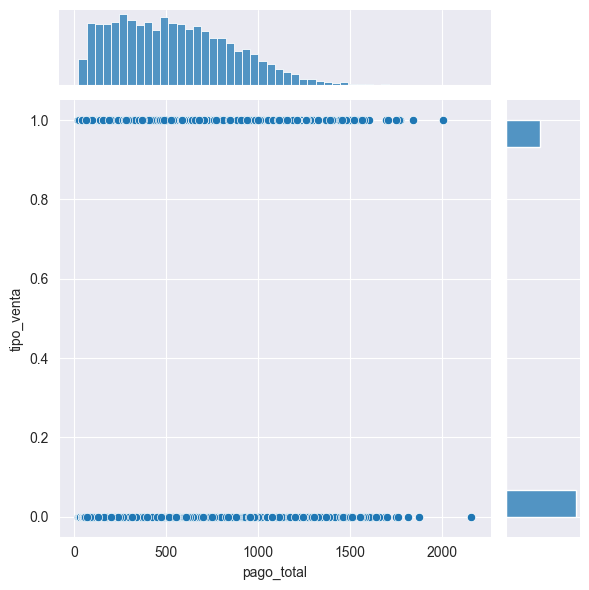

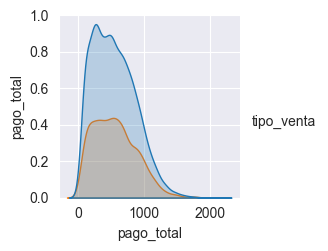

In [5]:
fig=sns.jointplot(x='pago_total',y='tipo_venta',data=data_raw)
sns.pairplot(data_raw, hue='tipo_venta')
plt.show()

------

In [ ]:
data_raw.isnull().sum()

In [ ]:
ventas_por_producto = data_flat.groupby('nombre').agg(cantidad_total=('cantidad', 'sum')).reset_index()
print(ventas_por_producto)